# Lista 6 - Geração de outras variáveis aleatórias importantes

<br>

#### Gerar realizações de variáveis normais padrão utilizando as aproximações dadas por: 

$$X = [U^{0,135} - (1-U^{0,135})]/0,1975$$  

In [135]:
import numpy as np              # Gerar amostras 
from scipy import stats         # Shapiro-Wilk test
import matplotlib.pyplot as plt # Para fazer gráficos
%matplotlib inline         

R:
```{r}
rnorm1 = function(n){
  u = runif(n,0,1)
  x = ( u ** (0.135) - (1 - u) ** 0.135) / 0.1975 
  return(x)
}
```

In [2]:

def rnorm1(n):
    u = x = np.random.uniform(low=0, high=1, size=n)
    x = (u ** (0.135) - (1 - u) ** 0.135) / 0.1975
    return(x)

#### e da soma de 12 ou mais variáveis uniformes $(U_i ∼ U (0, 1))$  independentes,   
$$ X = \displaystyle \sum^{12}_{i}U_i - 6$$  

R:
```{r}
rnorm2 = function(n){
  x = numeric()
  for (i  in 1:n) {
    U = runif(12)
    y = sum(U) - 6
    x = c(x, y)
  }
  return(x)
}
```

In [55]:
def rnorm2(n):
    x = []
    for i in range(0,n):
        U = np.random.uniform(0, 1, 12)
        y =  sum(U) - 6
        x.append(y)
    return(x)

**a) Criar as funções `rnorm1` e `rnorm2` e usá-las para gerar $n = 5.000$ realizações usando as duas funções.**

In [105]:
n = 5000
a = rnorm1(n) # Amostra gerada com a aproximação X = [U^0,135 − (1 − U)^0,135 ]/0,1975
a[0:20]

array([-0.13921778,  0.80560844, -0.99835787, -1.1255444 , -2.11394714,
       -1.60142435, -0.21054593,  0.51702138, -0.05935384, -0.87402112,
        0.54680017,  0.57312313,  1.2988426 , -1.107746  ,  0.1224813 ,
       -1.12208297, -1.29577747, -0.11725299, -0.99751657, -0.62447637])

In [93]:
stats.shapiro(a) # A amostra 'a' gerada com a função rnorm1 não segue distribuição normal

(0.9997787475585938, 0.9103104472160339)

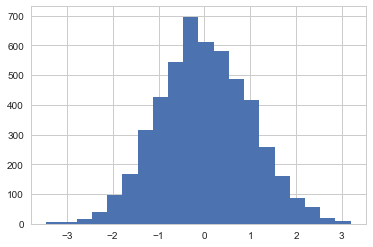

In [142]:
plt.hist(a, bins=20); # bins = número de barras

In [81]:
a = rnorm2(n) # Amostra gerada com a aproximação soma de 12 v.a.s uniformes independentes
a[0:10]

[0.37083847783343948,
 -0.78280071923217687,
 1.0618156220404718,
 1.6200245542677063,
 -1.6053733768531879,
 0.84874671094404963,
 0.63947194336510282,
 -0.40813963331763503,
 -0.64691548666921683,
 1.5375163607109439]

In [82]:
stats.shapiro(a) # A amostra 'a' gerada com a função rnorm1 não segue distribuição normal

(0.9992765784263611, 0.03871193528175354)

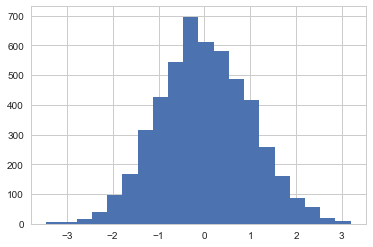

In [143]:
plt.hist(a, 20);

**b) Comparar os quantis 1%, 5%, 10%, 50%, 90%, 95% e 99% esperados da distribuição normal com os estimados.** 
```{r}
p = c(.01, .05, .1, .5, .9, .95, .99) #   quantis 1%, 5%, 10%, 50%, 90%, 95% e 99%
Qhat = quantile(a, p)
Q = qnorm(p)
round(rbind(Qhat, Q), 3)             

Qhat = quantile(b, p)
Q = qnorm(p)
round(rbind(Qhat, Q), 3)
```

In [ ]:
#https://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy#13865874

**c) Gerar também uma amostra de mesmo tamanho utilizando o algoritmo de Box-Müller. Estimar os mesmos quantis anteriores nesta amostra e comparar com os resultados anteriores.**
```{r}
BoxMuller = function(n, mu=0, sigma=1){
  # Polar: função que retorna dois números normais
  Polar = function(){  # função sem argumento
    repeat{
      u = runif(2, -1, 1) # 2 v. uniformes U(-1,1)
      r2 = as.numeric(u %*% u) # toma o quadrado
      if((r2 > 0) & (r2 < 1)) break
    } # fim do repeat
    ff = sqrt(-2 * log(r2) / r2)
    y = ff * u # vetor de dim 2 com var. normais padrao ind.
    y
  } # fim de polar
  if(n %% 2 == 0){ # n par
    k = n %/% 2 # pega a parte inteira da div.
    for(ki in 1:k){
      if(ki == 1) x = c(Polar()) else x = c(x, Polar())
    }  # for
  } else{ # n impar
    k = n %/% 2
    if(k == 0){ 
      x = Polar()[1]
    } else{
      for(ki in 1:k){
        if(ki == 1) x = c(Polar()) else x = c(x, Polar())
      } # for
      x = c(x, Polar()[1])
    } # else interno
  } # else n par
  x = x * sigma + mu  # transformar de N(0, 1) para N(mu, sigma)
  return(x)
} # fim de BoxMuller

c = BoxMuller(n)
head(c)

Qhat = quantile(c, p)
Q = qnorm(p)
round(rbind(Qhat, Q), 3)    # A diferença entre os quantis teóricos e os estimados é pequena para o caso da função BoxMuller 
                            # O que indica que a amostra segue a distribuição normal.

```

In [349]:
def BoxMuller(n): # Polar: função que retorna dois números normais
    def Polar():
        while True:
            u = np.random.uniform(2, -1, 2) # 2 v. uniformes U(-1,1)
            r2 = (u * u)
            if (all(r2 > 0) & all(r2 < 1)):
                break
        ff = np.sqrt(-2 * np.log(r2) / r2)
        y = ff * u # vetor de dim 2 com var. normais padrao ind.
        return(y)
    if(n % 2 == 0): # n par
        k = n // 2 # pega a parte inteira da div.
        for ki in range(1,k):
            if (ki == 1):
                x = Polar()
            else:
                x = np.concatenate(x, Polar())
    else: # n impar
        k = n // 2
        if(k == 0):
            x = Polar()[1]
        else:
            for ki in range(1,k):
                if(ki == 1):
                    x = Polar()
                else:
                    x = np.concatenate(x, Polar())
        x = np.concatenate(x, (Polar()[1]))
    x = x * sigma + mu  # transformar de N(0, 1) para N(mu, sigma)
    return(x)


In [350]:
BoxMuller(8)

TypeError: only length-1 arrays can be converted to Python scalars

**d) Gerar três QQ plots na mesma visualização para comparar o ajuste à normal das amostras geradas pelas diferentes funções**
```{r}

par(mfrow=c(1,3))

qqnorm(a)
qqline(a, col = "red") # qqplot convirma quq a amostra gerada pela função rnorm1 não segue a distribuição normal

qqnorm(b)
qqline(b, col = "red") # qqplot convirma quq a amostra gerada pela função rnorm2 segue a distribuição normal

qqnorm(c)
qqline(c, col = "red") # qqplot convirma quq a amostra gerada pela função BoxMuller segue a distribuição normal

```